In [11]:
import numpy as np 
import control as c  
import matplotlib.pyplot as plt 


In [12]:
Ts = 1 
OS = 10 


In [13]:

def psi_fun(Ts,pOS):
    return -4/Ts*(1-1j*np.pi/np.log(100/pOS))
psi = psi_fun(Ts,OS)
print("psi = %0.3g + j %0.3g" % (np.real(psi),np.imag(psi)))

psi = -4 + j 5.46


In [14]:
plant_tf = c.TransferFunction(15000,[1,50,875,6250,15000])


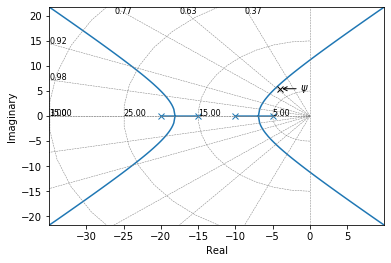

In [15]:
p1 = c.rlocus(plant_tf) # compute root locus 
plt.plot(np.real(psi),np.imag(psi),'kx') 
plt.annotate(
    '$\psi$', (np.real(psi),np.imag(psi)), textcoords='offset points', xytext=(20,-2), arrowprops={'arrowstyle':'->'}
)
plt.show() # display the plot

In [16]:
K1 = 0.64 # gain selection from root locus

In [20]:
controller_tf = K1 # controller transfer function 
closed_loop_tf = c.feedback(K1*plant_tf)

In [21]:
t,y = c.step_response(closed_loop_tf)


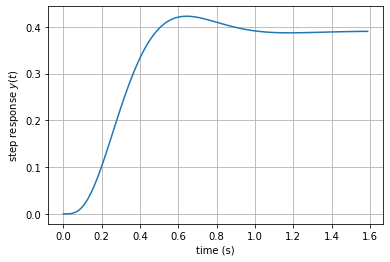

In [22]:
p2 = plt.plot(t,y) 
plt.xlabel('time (s)') 
plt.ylabel('step response $y(t)$') 
plt.grid()
plt.show()


In [23]:
si = c.step_info(closed_loop_tf) 
si

{'RiseTime': 0.28463337550583534,
 'SettlingTime': 0.9079645665577206,
 'SettlingMin': 0.3517528252237785,
 'SettlingMax': 0.42266931505211713,
 'Overshoot': 8.279065668843915,
 'Undershoot': 0.0,
 'Peak': 0.42266931505211713,
 'PeakTime': 0.6440028887143202,
 'SteadyStateValue': 0.3903518306528346}

In [24]:
print("percent OS: %3.3g" % si['Overshoot']) 
print("settling time: %3.3g" % si['SettlingTime'])

percent OS: 8.28
settling time: 0.908
